In [1]:
import os
import tensorflow as tf
from transformers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import gluonnlp as nlp
from gluonnlp.data import SentencepieceTokenizer

import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import numpy as np
import re

아레 실행 커멘드는 gpt_ckpt 폴더가 있지 않은 경우에만 실행해주세요.

In [2]:
import wget
import zipfile

wget.download('https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/releases/download/v1.0/gpt_ckpt.zip')

with zipfile.ZipFile('gpt_ckpt.zip') as z:
    z.extractall()

  0% [                                                                      ]    737280 / 460908853

  1% [                                                                      ]   5210112 / 460908853

  2% [.                                                                     ]  10764288 / 460908853

  3% [..                                                                    ]  15966208 / 460908853

  4% [..                                                                    ]  18440192 / 460908853

  4% [...                                                                   ]  21266432 / 460908853

  5% [...                                                                   ]  23461888 / 460908853

  5% [...                                                                   ]  25280512 / 460908853

  5% [....                                                                  ]  27181056 / 460908853

  6% [....                                                                  ]  29106176 / 460908853

  6% [....                                                                  ]  31064064 / 460908853

  7% [.....                                                                 ]  33079296 / 460908853

  7% [.....                                                                 ]  35061760 / 460908853

  8% [.....                                                                 ]  37126144 / 460908853

  8% [.....                                                                 ]  39092224 / 460908853

  8% [......                                                                ]  41172992 / 460908853

  9% [......                                                                ]  43245568 / 460908853

  9% [......                                                                ]  45383680 / 460908853

 10% [.......                                                               ]  47398912 / 460908853

 10% [.......                                                               ]  49545216 / 460908853

 11% [.......                                                               ]  51658752 / 460908853

 11% [........                                                              ]  53788672 / 460908853

 12% [........                                                              ]  55934976 / 460908853

 12% [........                                                              ]  58056704 / 460908853

 13% [.........                                                             ]  60227584 / 460908853

 13% [.........                                                             ]  62373888 / 460908853

 14% [.........                                                             ]  64552960 / 460908853

 14% [..........                                                            ]  66682880 / 460908853

 14% [..........                                                            ]  68780032 / 460908853

 15% [..........                                                            ]  71032832 / 460908853

 15% [...........                                                           ]  73203712 / 460908853

 16% [...........                                                           ]  75350016 / 460908853

 16% [...........                                                           ]  77660160 / 460908853

 17% [............                                                          ]  79986688 / 460908853

 17% [............                                                          ]  82264064 / 460908853

 18% [............                                                          ]  84541440 / 460908853

 18% [.............                                                         ]  86786048 / 460908853

 19% [.............                                                         ]  89128960 / 460908853

 19% [.............                                                         ]  91226112 / 460908853

 20% [..............                                                        ]  93634560 / 460908853

 20% [..............                                                        ]  96059392 / 460908853

 21% [..............                                                        ]  98369536 / 460908853

 21% [...............                                                       ] 100777984 / 460908853

 22% [...............                                                       ] 103071744 / 460908853

 22% [................                                                      ] 105562112 / 460908853

 23% [................                                                      ] 108044288 / 460908853

 23% [................                                                      ] 110477312 / 460908853

 24% [.................                                                     ] 112869376 / 460908853

 25% [.................                                                     ] 115376128 / 460908853

 25% [.................                                                     ] 117932032 / 460908853

 26% [..................                                                    ] 120455168 / 460908853

 26% [..................                                                    ] 123043840 / 460908853

 27% [...................                                                   ] 125534208 / 460908853

 27% [...................                                                   ] 127852544 / 460908853

 28% [...................                                                   ] 130596864 / 460908853

 28% [....................                                                  ] 133251072 / 460908853

 29% [....................                                                  ] 135725056 / 460908853

 30% [.....................                                                 ] 138346496 / 460908853

 30% [.....................                                                 ] 141049856 / 460908853

 31% [.....................                                                 ] 143753216 / 460908853

 31% [......................                                                ] 146415616 / 460908853

 32% [......................                                                ] 149127168 / 460908853

 32% [.......................                                               ] 151814144 / 460908853

 33% [.......................                                               ] 154386432 / 460908853

 34% [.......................                                               ] 157097984 / 460908853

 34% [........................                                              ] 159809536 / 460908853

 35% [........................                                              ] 162496512 / 460908853

 35% [.........................                                             ] 165298176 / 460908853

 36% [.........................                                             ] 167985152 / 460908853

 37% [.........................                                             ] 170754048 / 460908853

 37% [..........................                                            ] 173588480 / 460908853

 38% [..........................                                            ] 176537600 / 460908853

 38% [...........................                                           ] 179388416 / 460908853

 39% [...........................                                           ] 182222848 / 460908853

 40% [............................                                          ] 185139200 / 460908853

 40% [............................                                          ] 188170240 / 460908853

 41% [.............................                                         ] 191430656 / 460908853

 42% [.............................                                         ] 194707456 / 460908853

 42% [.............................                                         ] 197476352 / 460908853

 43% [..............................                                        ] 200966144 / 460908853

 44% [...............................                                       ] 204275712 / 460908853

 45% [...............................                                       ] 207814656 / 460908853

 45% [................................                                      ] 211017728 / 460908853

 46% [................................                                      ] 213098496 / 460908853

 46% [................................                                      ] 214646784 / 460908853

 46% [................................                                      ] 216137728 / 460908853

 47% [.................................                                     ] 217726976 / 460908853

 47% [.................................                                     ] 219381760 / 460908853

 47% [.................................                                     ] 221003776 / 460908853

 48% [.................................                                     ] 222691328 / 460908853

 48% [..................................                                    ] 224378880 / 460908853

 49% [..................................                                    ] 226099200 / 460908853

 49% [..................................                                    ] 227827712 / 460908853

 49% [..................................                                    ] 229539840 / 460908853

 50% [...................................                                   ] 231276544 / 460908853

 50% [...................................                                   ] 233046016 / 460908853

 50% [...................................                                   ] 234848256 / 460908853

 51% [...................................                                   ] 236617728 / 460908853

 51% [....................................                                  ] 238419968 / 460908853

 52% [....................................                                  ] 240140288 / 460908853

 52% [....................................                                  ] 241958912 / 460908853

 52% [.....................................                                 ] 243810304 / 460908853

 53% [.....................................                                 ] 245661696 / 460908853

 53% [.....................................                                 ] 247521280 / 460908853

 54% [.....................................                                 ] 249430016 / 460908853

 54% [......................................                                ] 251387904 / 460908853

 54% [......................................                                ] 253280256 / 460908853

 55% [......................................                                ] 255164416 / 460908853

 55% [.......................................                               ] 257114112 / 460908853

 56% [.......................................                               ] 259080192 / 460908853

 56% [.......................................                               ] 261062656 / 460908853

 57% [.......................................                               ] 263061504 / 460908853

 57% [........................................                              ] 265093120 / 460908853

 57% [........................................                              ] 267157504 / 460908853

 58% [........................................                              ] 269139968 / 460908853

 58% [.........................................                             ] 271204352 / 460908853

 59% [.........................................                             ] 273317888 / 460908853

 59% [.........................................                             ] 275382272 / 460908853

 60% [..........................................                            ] 277463040 / 460908853

 60% [..........................................                            ] 279625728 / 460908853

 61% [..........................................                            ] 281772032 / 460908853

 61% [...........................................                           ] 283852800 / 460908853

 62% [...........................................                           ] 286081024 / 460908853

 62% [...........................................                           ] 288178176 / 460908853

 63% [............................................                          ] 290381824 / 460908853

 63% [............................................                          ] 292634624 / 460908853

 63% [............................................                          ] 294895616 / 460908853

 64% [.............................................                         ] 297107456 / 460908853

 64% [.............................................                         ] 299302912 / 460908853

 65% [.............................................                         ] 301645824 / 460908853

 65% [..............................................                        ] 303874048 / 460908853

 66% [..............................................                        ] 306216960 / 460908853

 66% [..............................................                        ] 308543488 / 460908853

 67% [...............................................                       ] 310788096 / 460908853

 67% [...............................................                       ] 313360384 / 460908853

 68% [...............................................                       ] 315777024 / 460908853

 69% [................................................                      ] 318128128 / 460908853

 69% [................................................                      ] 320446464 / 460908853

 70% [.................................................                     ] 322830336 / 460908853

 70% [.................................................                     ] 325304320 / 460908853

 71% [.................................................                     ] 327720960 / 460908853

 71% [..................................................                    ] 330219520 / 460908853

 72% [..................................................                    ] 332718080 / 460908853

 72% [..................................................                    ] 335257600 / 460908853

 73% [...................................................                   ] 337821696 / 460908853

 73% [...................................................                   ] 340377600 / 460908853

 74% [....................................................                  ] 343031808 / 460908853

 75% [....................................................                  ] 345784320 / 460908853

 75% [....................................................                  ] 348536832 / 460908853

 76% [.....................................................                 ] 351387648 / 460908853

 76% [.....................................................                 ] 354304000 / 460908853

 77% [......................................................                ] 357187584 / 460908853

 78% [......................................................                ] 360267776 / 460908853

 78% [.......................................................               ] 363315200 / 460908853

 79% [.......................................................               ] 365813760 / 460908853

 80% [........................................................              ] 369000448 / 460908853

 80% [........................................................              ] 372178944 / 460908853

 81% [........................................................              ] 374276096 / 460908853

 81% [.........................................................             ] 377520128 / 460908853

 82% [.........................................................             ] 381124608 / 460908853

 83% [..........................................................            ] 384942080 / 460908853

 84% [..........................................................            ] 388218880 / 460908853

 84% [...........................................................           ] 391462912 / 460908853

 85% [...........................................................           ] 393297920 / 460908853

 85% [...........................................................           ] 394862592 / 460908853

 86% [............................................................          ] 396525568 / 460908853

 86% [............................................................          ] 398262272 / 460908853

 86% [............................................................          ] 399982592 / 460908853

 87% [.............................................................         ] 401719296 / 460908853

 87% [.............................................................         ] 403505152 / 460908853

 87% [.............................................................         ] 404439040 / 460908853

 88% [.............................................................         ] 405897216 / 460908853

 88% [.............................................................         ] 407453696 / 460908853

 88% [..............................................................        ] 409272320 / 460908853

 89% [..............................................................        ] 411074560 / 460908853

 89% [..............................................................        ] 412909568 / 460908853

 89% [..............................................................        ] 414695424 / 460908853

 90% [...............................................................       ] 416546816 / 460908853

 90% [...............................................................       ] 418365440 / 460908853

 91% [...............................................................       ] 420249600 / 460908853

 91% [................................................................      ] 422150144 / 460908853

 92% [................................................................      ] 424067072 / 460908853

 92% [................................................................      ] 425885696 / 460908853

 92% [................................................................      ] 427737088 / 460908853

 93% [.................................................................     ] 429719552 / 460908853

 93% [.................................................................     ] 431636480 / 460908853

 94% [.................................................................     ] 433586176 / 460908853

 94% [..................................................................    ] 435552256 / 460908853

 94% [..................................................................    ] 437583872 / 460908853

 95% [..................................................................    ] 439533568 / 460908853

 95% [...................................................................   ] 441540608 / 460908853

 96% [...................................................................   ] 443564032 / 460908853

 96% [...................................................................   ] 445628416 / 460908853

 97% [...................................................................   ] 447692800 / 460908853

 97% [....................................................................  ] 449724416 / 460908853

 98% [....................................................................  ] 451821568 / 460908853

 98% [....................................................................  ] 453935104 / 460908853

 98% [..................................................................... ] 455925760 / 460908853

 99% [..................................................................... ] 458129408 / 460908853

 99% [..................................................................... ] 460275712 / 460908853

100% [......................................................................] 460908853 / 460908853

In [3]:
# 시각화

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [4]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [5]:
TOKENIZER_PATH = './gpt_ckpt/gpt2_kor_tokenizer.spiece'

tokenizer = SentencepieceTokenizer(TOKENIZER_PATH, alpha=0)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(TOKENIZER_PATH,
                                               mask_token=None,
                                               sep_token='<unused0>',
                                               cls_token=None,
                                               unknown_token='<unk>',
                                               padding_token='<pad>',
                                               bos_token='<s>',
                                               eos_token='</s>')

# KoSTS Simliarity 

In [6]:
tf.random.set_seed(0)
np.random.seed(0)

BATCH_SIZE = 10
NUM_EPOCHS = 3
VALID_SPLIT = 0.2
SENT_MAX_LEN = 14

DATA_IN_PATH = 'data_in/KOR'
DATA_OUT_PATH = "data_out/KOR"

In [7]:
# Load Train dataset

TRAIN_STS_DF = os.path.join(DATA_IN_PATH, 'KorSTS', 'sts-train.tsv')
DEV_STS_DF = os.path.join(DATA_IN_PATH, 'KorSTS', 'sts-dev.tsv')

train_data = pd.read_csv(TRAIN_STS_DF, header=0, delimiter = '\t', quoting = 3)
dev_data = pd.read_csv(DEV_STS_DF, header=0, delimiter = '\t', quoting = 3)

train_data = train_data.dropna()

dev_data = dev_data.dropna()

print("Total # dataset: train - {}, dev - {}".format(len(train_data), len(dev_data)))

Total # dataset: train - 5749, dev - 1500


In [8]:
# 토크나이저를 제외하고는 5장에서 처리한 방식과 유사하게 접근
def clean_text(sent):
    sent_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", " ", sent)
    return sent_clean

train_data_sents1 = []
train_data_sents2 = []
train_labels = []


for sent1, sent2, score in train_data[['sentence1', 'sentence2', 'score']].values:
    train_tokenized_sent_1 = vocab[tokenizer(clean_text(sent1))]
    train_tokenized_sent_2 = vocab[tokenizer(clean_text(sent2))]
    tokens1 = [vocab[vocab.bos_token]] 
    tokens1 += pad_sequences([train_tokenized_sent_1], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens1 += [vocab[vocab.sep_token]]  
    tokens1 += pad_sequences([train_tokenized_sent_2], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens1 += [vocab[vocab.eos_token]]
    tokens2 = [vocab[vocab.bos_token]] 
    tokens2 += pad_sequences([train_tokenized_sent_2], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens2 += [vocab[vocab.sep_token]]  
    tokens2 += pad_sequences([train_tokenized_sent_1], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens2 += [vocab[vocab.eos_token]]
    
    train_data_sents1.append(tokens1)
    train_data_sents2.append(tokens2)
    train_labels.append(score)

train_data_sents1 = np.array(train_data_sents1, dtype=np.int64)
train_data_sents2 = np.array(train_data_sents2, dtype=np.int64)
train_data_sents = (train_data_sents1, train_data_sents2)
train_data_labels = np.array(train_labels)

In [9]:
dev_data_sents1 = []
dev_data_sents2 = []
dev_labels = []


for sent1, sent2, score in dev_data[['sentence1', 'sentence2', 'score']].values:
    dev_tokenized_sent_1 = vocab[tokenizer(clean_text(sent1))]
    dev_tokenized_sent_2 = vocab[tokenizer(clean_text(sent2))]
    tokens1 = [vocab[vocab.bos_token]] 
    tokens1 += pad_sequences([dev_tokenized_sent_1], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens1 += [vocab[vocab.sep_token]]  
    tokens1 += pad_sequences([dev_tokenized_sent_2], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens1 += [vocab[vocab.eos_token]]
    tokens2 = [vocab[vocab.bos_token]] 
    tokens2 += pad_sequences([dev_tokenized_sent_2], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens2 += [vocab[vocab.sep_token]]  
    tokens2 += pad_sequences([dev_tokenized_sent_1], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens2 += [vocab[vocab.eos_token]]
    
    dev_data_sents1.append(tokens1)
    dev_data_sents2.append(tokens2)
    dev_labels.append(score)

dev_data_sents1 = np.array(dev_data_sents1, dtype=np.int64)
dev_data_sents2 = np.array(dev_data_sents2, dtype=np.int64)
dev_data_sents = (dev_data_sents1, dev_data_sents2)
dev_data_labels = np.array(dev_labels)

In [10]:
print("Shape of dataset: train - ({}, {}), dev - ({}, {})".format(train_data_sents[0].shape, train_data_sents[1].shape, dev_data_sents[0].shape, dev_data_sents[1].shape))

Shape of dataset: train - ((5749, 31), (5749, 31)), dev - ((1500, 31), (1500, 31))


In [12]:
class TFGPT2Regressor(tf.keras.Model):
    def __init__(self, dir_path, num_class):
        super(TFGPT2Regressor, self).__init__()
        
        self.gpt2 = TFGPT2Model.from_pretrained(dir_path)
        self.num_class = num_class
        self.dropout = tf.keras.layers.Dropout(self.gpt2.config.summary_first_dropout)
        self.regressor = tf.keras.layers.Dense(self.num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=self.gpt2.config.initializer_range), 
                                                name="regressior")
        
    def call(self, inputs):
        outputs1 = self.gpt2(inputs[0])
        outputs2 = self.gpt2(inputs[1])
        outputs = outputs1[0] + outputs2[0]
        pooled_output = outputs[:, -1, :]

        pooled_output = self.dropout(pooled_output)
        logits = self.regressor(pooled_output)

        return logits

In [13]:
regression_model = TFGPT2Regressor('./gpt_ckpt', 1)

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at ./gpt_ckpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [14]:
class PearsonCorrelationMetric(tf.keras.metrics.Metric):
    def __init__(self, name="pearson_correlation", **kwargs):
        super(PearsonCorrelationMetric, self).__init__(name=name, **kwargs)
        self.y_true_list = []
        self.y_pred_list = []

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(y_true, shape=[-1])
        y_pred = tf.reshape(y_pred, shape=[-1])
        self.y_true_list.append(y_true)
        self.y_pred_list.append(y_pred)

    def result(self):
        y_true = tf.concat(self.y_true_list, -1)
        y_pred = tf.concat(self.y_pred_list, -1)
        pearson_correlation = self.pearson(y_true, y_pred)
        
        return pearson_correlation

    def reset_states(self):
        self.y_true_list = []
        self.y_pred_list = []
        

    def pearson(self, true, pred):
        m_true = tf.reduce_mean(true)
        m_pred = tf.reduce_mean(pred)
        m_true, m_pred = true-m_true, pred-m_pred
        r_num = tf.reduce_sum(tf.multiply(m_true, m_pred))
        r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(m_true)), tf.reduce_sum(tf.square(m_pred)))) + 1e-12
        return r_num / r_den

In [15]:
optimizer = tf.keras.optimizers.Adam(6.25e-5)
loss = tf.keras.losses.MeanSquaredError()
metric = PearsonCorrelationMetric()
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metric], run_eagerly=True)

In [21]:
model_name = "tf2_gpt_korsts"

earlystop_callback = EarlyStopping(monitor='val_pearson_correlation', min_delta=0.0001,patience=3,mode='max')

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_pearson_correlation', verbose=1, save_best_only=True, save_weights_only=True,mode='max')

history = regression_model.fit(train_data_sents, train_data_labels, epochs=NUM_EPOCHS,
                        validation_data = (dev_data_sents, dev_data_labels),
            batch_size=BATCH_SIZE, callbacks=[earlystop_callback, cp_callback])

data_out/KOR\tf2_gpt_korsts -- Folder already exists 

Epoch 1/3
575/575 [==============================] - 217s 377ms/step - loss: 2.0958 - pearson_correlation: 0.1852 - val_loss: 2.5764 - val_pearson_correlation: 0.0830

Epoch 00001: val_pearson_correlation improved from -inf to 0.08299, saving model to data_out/KOR\tf2_gpt_korsts\weights.h5
Epoch 2/3
575/575 [==============================] - 200s 348ms/step - loss: 1.3543 - pearson_correlation: 0.6069 - val_loss: 1.3504 - val_pearson_correlation: 0.7129

Epoch 00002: val_pearson_correlation improved from 0.08299 to 0.71295, saving model to data_out/KOR\tf2_gpt_korsts\weights.h5
Epoch 3/3
575/575 [==============================] - 199s 346ms/step - loss: 0.7535 - pearson_correlation: 0.8054 - val_loss: 1.1349 - val_pearson_correlation: 0.7492

Epoch 00003: val_pearson_correlation improved from 0.71295 to 0.74925, saving model to data_out/KOR\tf2_gpt_korsts\weights.h5


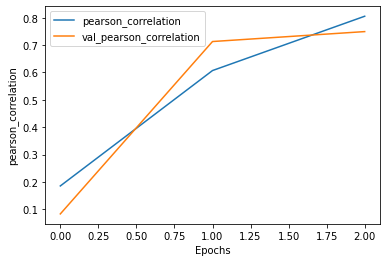

In [22]:
plot_graphs(history, 'pearson_correlation')

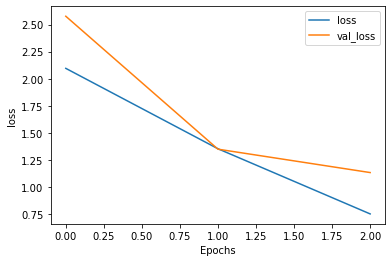

In [23]:
plot_graphs(history, 'loss')

# KorSTSTEST

In [24]:
# Load Test dataset
TEST_STS_DF = os.path.join(DATA_IN_PATH, 'KorSTS', 'sts-test.tsv')

test_data = pd.read_csv(TEST_STS_DF, header=0, delimiter = '\t', quoting = 3)
test_data = test_data.dropna()
test_data.head()

genre filename      year  id  score                sentence1  \
0  main-captions   MSRvid  2012test  24    2.5     한 소녀가 머리를 스타일링하고 있다.   
1  main-captions   MSRvid  2012test  33    3.6  한 무리의 남자들이 해변에서 축구를 한다.   
2  main-captions   MSRvid  2012test  45    5.0  한 여성이 다른 여성의 발목을 재고 있다.   
3  main-captions   MSRvid  2012test  63    4.2        한 남자가 오이를 자르고 있다.   
4  main-captions   MSRvid  2012test  66    1.5       한 남자가 하프를 연주하고 있다.   

                    sentence2  
0            한 소녀가 머리를 빗고 있다.  
1  한 무리의 소년들이 해변에서 축구를 하고 있다.  
2      한 여자는 다른 여자의 발목을 측정한다.  
3           한 남자가 오이를 자르고 있다.  
4         한 남자가 키보드를 연주하고 있다.

In [25]:
test_data_sents1 = []
test_data_sents2 = []
test_labels = []


for sent1, sent2, score in test_data[['sentence1', 'sentence2', 'score']].values:
    test_tokenized_sent_1 = vocab[tokenizer(clean_text(sent1))]
    test_tokenized_sent_2 = vocab[tokenizer(clean_text(sent2))]
    tokens1 = [vocab[vocab.bos_token]] 
    tokens1 += pad_sequences([test_tokenized_sent_1], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens1 += [vocab[vocab.sep_token]]  
    tokens1 += pad_sequences([test_tokenized_sent_2], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens1 += [vocab[vocab.eos_token]]
    tokens2 = [vocab[vocab.bos_token]] 
    tokens2 += pad_sequences([test_tokenized_sent_2], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens2 += [vocab[vocab.sep_token]]  
    tokens2 += pad_sequences([test_tokenized_sent_1], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens2 += [vocab[vocab.eos_token]]
    
    test_data_sents1.append(tokens1)
    test_data_sents2.append(tokens2)
    test_labels.append(score)

test_data_sents1 = np.array(test_data_sents1, dtype=np.int64)
test_data_sents2 = np.array(test_data_sents2, dtype=np.int64)
test_data_sents = (test_data_sents1, test_data_sents2)
test_data_labels = np.array(test_labels)

In [26]:
print("# sents: {}, # labels: {}".format(len(test_data_sents), len(test_data_labels)))

# sents: 2, # labels: 1379


In [27]:
regression_model.save_weights("data_out/KOR/tf_gpt2_finetune_KorSTS/weights_STS.h5")

In [28]:
regression_model.load_weights("data_out/KOR/tf_gpt2_finetune_KorSTS/weights_STS.h5")

In [29]:
results = regression_model.evaluate(test_data_sents, test_data_labels, batch_size=512)
print("test loss, test pearson correlation: ", results)

3/3 [==============================] - 1s 334ms/step - loss: 1.1302 - pearson_correlation: 0.7255
test loss, test pearson correlation:  [1.1301852464675903, 0.7254825830459595]


In [36]:
sent1 = '한 남자가 하프를 연주하고 있다.'
sent2 = '한 남자가 피아노를를 연주하고 있다.'

test_data_sents1 = []
test_data_sents2 = []

test_tokenized_sent_1 = vocab[tokenizer(clean_text(sent1))]
test_tokenized_sent_2 = vocab[tokenizer(clean_text(sent2))]
tokens1 = [vocab[vocab.bos_token]] 
tokens1 += pad_sequences([test_tokenized_sent_1], 
                        SENT_MAX_LEN, 
                        value=vocab[vocab.padding_token], 
                        padding='post').tolist()[0] 
tokens1 += [vocab[vocab.sep_token]]  
tokens1 += pad_sequences([test_tokenized_sent_2], 
                        SENT_MAX_LEN, 
                        value=vocab[vocab.padding_token], 
                        padding='post').tolist()[0] 
tokens1 += [vocab[vocab.eos_token]]
tokens2 = [vocab[vocab.bos_token]] 
tokens2 += pad_sequences([test_tokenized_sent_2], 
                        SENT_MAX_LEN, 
                        value=vocab[vocab.padding_token], 
                        padding='post').tolist()[0] 
tokens2 += [vocab[vocab.sep_token]]  
tokens2 += pad_sequences([test_tokenized_sent_1], 
                        SENT_MAX_LEN, 
                        value=vocab[vocab.padding_token], 
                        padding='post').tolist()[0] 
tokens2 += [vocab[vocab.eos_token]]

test_data_sents1.append(tokens1)
test_data_sents2.append(tokens2)

test_data_sents1 = np.array(test_data_sents1, dtype=np.int64)
test_data_sents2 = np.array(test_data_sents2, dtype=np.int64)
test_data_sents = (test_data_sents1, test_data_sents2)

result = regression_model.predict(test_data_sents)

print(type(result))
print(result)

<class 'numpy.ndarray'>
[[2.863218]]
